In [4]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd


# Dosya yolunu belirtin
dosya_yolu = "/Users/beyzacakici/Desktop/train_project.csv"  # KullanıcıAdı kısmını kendi kullanıcı adınızla değiştirin

# CSV dosyasını okuyun
df = pd.read_csv(dosya_yolu)

# Veriyi gösterin
df.head()

,69769,-946,0.1613,0.7959999999999999,Panl,N,Bus2,0.0742,0,2,...,1.0.1,-4670,0.9851.2,0.0.13,0.26,Mard,0.0.14,0.3333.2,0.27,0.28
0,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
1,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
2,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
3,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
4,114510,365243,0.1067,0.8096,Panl,N,XNAA,0.0525,0,2,...,2.0,-4138,0.9861,0.0,0,Mard,0.0,0.4583,0,0


In [6]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]
     

In [3]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
1       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
2        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
3        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
4       114510  365243  0.1067  0.8096  Panl  N  XNAA  0.0525   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246002  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246003  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246004  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246005  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246006    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

In [7]:
x = df.drop(['C122'], axis = 1)
y = df['C122']

In [8]:
#class distribution 

y.value_counts()

0    226147
1     19860
Name: C122, dtype: int64

<AxesSubplot:ylabel='C122'>

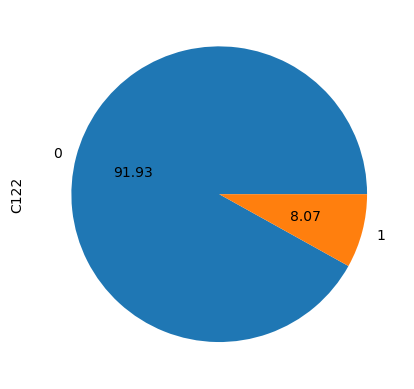

In [9]:
#show pie plot (Approach 1)

y.value_counts().plot.pie(autopct='%.2f')

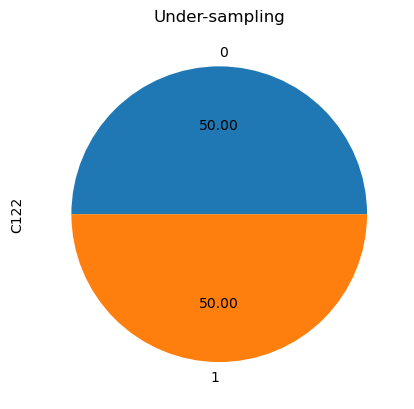

In [28]:
#random undersampling

from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(sampling_strategy=1) #float 

rus = RandomUnderSampler(sampling_strategy = "not minority") #string

x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Under-sampling")



In [29]:
#class distribution 

y_res.value_counts()

0    19860
1    19860
Name: C122, dtype: int64

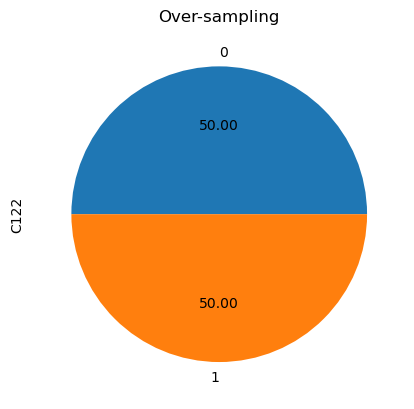

In [30]:
#random oversampling

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) #float 

ros = RandomOverSampler(sampling_strategy = "not majority") #string

x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Over-sampling")


In [31]:
y_res.value_counts()

0    226147
1    226147
Name: C122, dtype: int64